In [1]:

import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
print("Loading model... please wait.")
model = api.load("word2vec-google-news-300")
print("Model loaded!")

Loading model... please wait.
Model loaded!


In [3]:
target_word = "king"
similar_words = model.most_similar(target_word, topn=5)

print(f"Words most similar to '{target_word}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Words most similar to 'king':
kings: 0.7138
queen: 0.6511
monarch: 0.6413
crown_prince: 0.6204
prince: 0.6160


Word Vector Arithmetic


{King} - {Man} + {Woman} = {Queen}

In [4]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

print(f"King - Man + Woman = {result[0][0]}")

King - Man + Woman = queen


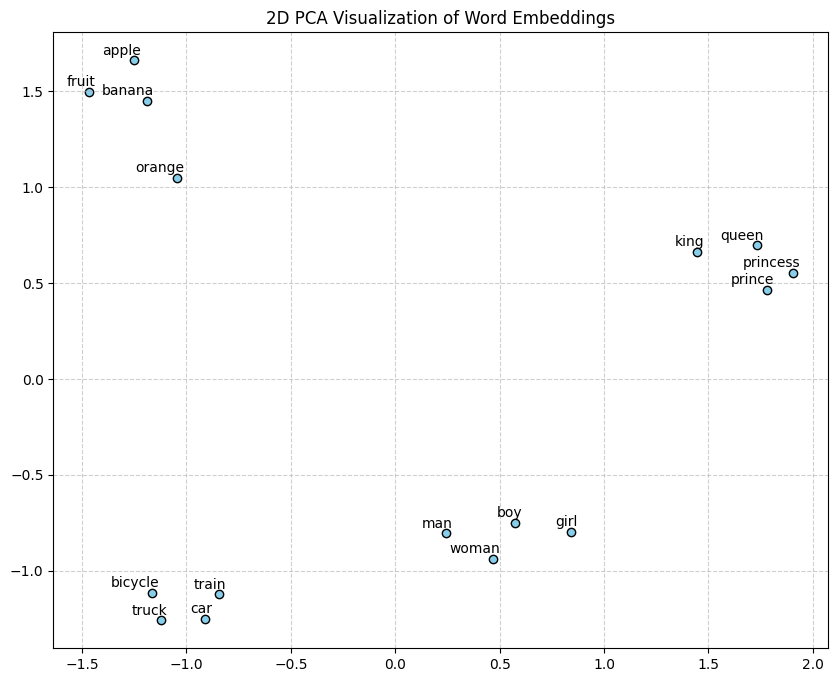

In [ ]:
# Block 5: Visualization
words_to_plot = [
    "king", "queen", "prince", "princess", 
    "apple", "orange", "banana", "fruit",
    "bicycle", "car", "truck", "train",
    "man", "woman", "boy", "girl"
]

#Extracting vectors from the words
word_vectors = np.array([model[w] for w in words_to_plot])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], edgecolors='k', c='skyblue')

for i, word in enumerate(words_to_plot):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom')

plt.title("2D PCA Visualization of Word Embeddings")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()